In [5]:
import tensorflow as tf
import csv
#import matplotlib.pyplot as plt
from time import time
import os
import cv2
import numpy as np
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt

In [6]:
num_classes = 8
channels=3
img_rows=64
img_cols=64
img_pixel=(img_rows*img_cols*channels)
trainEpochs =10#執行15次訓練週期
batchSize = 10 #每一批次比數100
photo_channel=39

In [7]:
image_types = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")

def list_images(basePath, contains=None):
    # 返回有效的图片路径数据集
    return list_files(basePath, validExts=image_types, contains=contains)
 
def list_files(basePath, validExts=None, contains=None):
    # 遍历图片数据目录，生成每张图片的路径
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        # 循环遍历当前目录中的文件名
        for filename in filenames:
            # if the contains string is not none and the filename does not contain
            # the supplied string, then ignore the file
            if contains is not None and filename.find(contains) == -1:
                continue
 
            # 通过确定.的位置，从而确定当前文件的文件扩展名
            ext = filename[filename.rfind("."):].lower()
 
            # 检查文件是否为图像，是否应进行处理
            if validExts is None or ext.endswith(validExts):
                # 构造图像路径
                imagePath = os.path.join(rootDir, filename)
                yield imagePath

In [8]:
print("------load data------")
path1 = 'C:/Users/eric/Desktop/ML/2HW/DATA/'
data = []
labels = []

# 路徑
imagePaths = sorted(list(list_images(path1)))
random.seed(10)
random.shuffle(imagePaths)
 
# 讀取
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (img_rows,img_cols))
    data.append(image)
    
    # 建立label
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
    
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)

(x_train, x_test, y_train, y_test) = train_test_split(data,
     labels, test_size=0.2, random_state=42)

#將y_test、y_train轉換成(總數,標籤)，若無lb，則只會顯示(總數) 
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

print("------load success------")

------load data------
------load success------


In [9]:
model = Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),
                  input_shape=(img_rows,img_cols,3),
                  activation='relu',
                  padding='same'))

model.add(Dropout(rate=0.25))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=64,kernel_size=(3,3),
                activation='relu',
                  padding='same'))

model.add(Dropout(rate=0.25))

model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))



model.add(Dense(y_train.shape[1],activation='softmax'))


In [10]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# H = model.fit(x=x_train,
#                           y=y_train,
#                           validation_split=0,
#                           epochs=trainEpochs,
#                           batch_size=batchSize,
#                           verbose=1)
H = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test),
              epochs=trainEpochs, batch_size=batchSize)

Epoch 1/10
511/511 [==============================] - 85s 165ms/step - loss: 0.5314 - accuracy: 0.4599 - val_loss: 0.4376 - val_accuracy: 0.5831
Epoch 2/10
511/511 [==============================] - 84s 164ms/step - loss: 0.4135 - accuracy: 0.5935 - val_loss: 0.4520 - val_accuracy: 0.5533
Epoch 3/10
511/511 [==============================] - 84s 165ms/step - loss: 0.3876 - accuracy: 0.6290 - val_loss: 0.4240 - val_accuracy: 0.5940
Epoch 4/10
511/511 [==============================] - 83s 163ms/step - loss: 0.3638 - accuracy: 0.6825 - val_loss: 0.4089 - val_accuracy: 0.6332
Epoch 5/10
511/511 [==============================] - 89s 174ms/step - loss: 0.3422 - accuracy: 0.6896 - val_loss: 0.3964 - val_accuracy: 0.6473
Epoch 6/10
511/511 [==============================] - 87s 170ms/step - loss: 0.3038 - accuracy: 0.7261 - val_loss: 0.4178 - val_accuracy: 0.6003
Epoch 7/10
511/511 [==============================] - 89s 173ms/step - loss: 0.2647 - accuracy: 0.7748 - val_loss: 0.4245 - val_ac

                                              precision    recall  f1-score   support

                                           A       0.64      0.64      0.64       379
                                           B       0.57      0.57      0.57       476
                                           C       0.63      0.69      0.66       365
C:/Users/eric/Desktop/ML/2HW/DATA/Test_Image       0.00      0.00      0.00        56

                                    accuracy                           0.60      1276
                                   macro avg       0.46      0.48      0.47      1276
                                weighted avg       0.58      0.60      0.59      1276



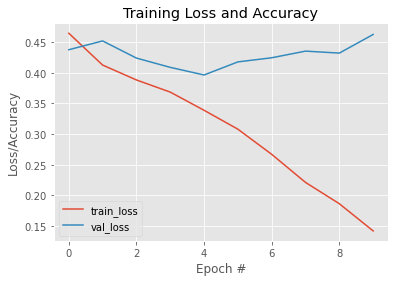

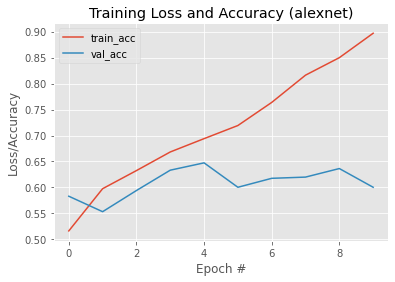

In [11]:
from sklearn.metrics import classification_report
("[INFO] evaluating network...")
predictions = model.predict(x=x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=lb.classes_))

# plot the training loss and accuracy
N = np.arange(0, trainEpochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

plt.savefig("C:/Users/eric/Desktop/ML/2HW/demo/")

plt.figure()
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (alexnet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("C:/Users/eric/Desktop/ML/2HW/demo/")